In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

flights = pd.read_csv('flights.csv')
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')

print(flights.shape)
print(airlines.shape)
print(airports.shape)

(5819079, 31)
(14, 2)
(322, 7)


In [2]:
print(flights.shape)

(5819079, 31)


In [3]:
flights.dtypes.head(10)

YEAR                    int64
MONTH                   int64
DAY                     int64
DAY_OF_WEEK             int64
AIRLINE                object
FLIGHT_NUMBER           int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE     int64
dtype: object

In [4]:
flights = pd.read_csv('flights.csv', low_memory=False)

In [5]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [6]:
airlines.columns

Index(['IATA_CODE', 'AIRLINE'], dtype='object')

In [7]:
airports.columns

Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [8]:
flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [9]:
# Fill missing delay values with 0
delay_cols = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 
               'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
flights[delay_cols] = flights[delay_cols].fillna(0)

# For cancelled flights, fill ARRIVAL_DELAY with 0
flights['ARRIVAL_DELAY'] = flights['ARRIVAL_DELAY'].fillna(0)

In [10]:
flights.duplicated().sum()
flights.drop_duplicates(inplace=True)

In [11]:
flights = flights[flights['AIRLINE'].isin(airlines['IATA_CODE'])]
flights = flights[flights['ORIGIN_AIRPORT'].isin(airports['IATA_CODE'])]
flights = flights[flights['DESTINATION_AIRPORT'].isin(airports['IATA_CODE'])]

In [12]:
flights['DEPARTURE_DELAY'] = flights['DEPARTURE_DELAY'].clip(lower=0)
flights['ARRIVAL_DELAY'] = flights['ARRIVAL_DELAY'].clip(lower=0)

In [13]:
flights['DATE'] = pd.to_datetime(flights[['YEAR', 'MONTH', 'DAY']])

In [14]:
flights.describe(include='all')

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
count,5332914.0,5.332914e+06,5.332914e+06,5.332914e+06,5332914,5.332914e+06,5318547,5332914,5332914,5.332914e+06,...,5.332914e+06,5.332914e+06,5.332914e+06,87430,5.332914e+06,5.332914e+06,5.332914e+06,5.332914e+06,5.332914e+06,5332914
unique,NaN,NaN,NaN,NaN,14,NaN,4896,322,322,NaN,...,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,WN,NaN,N480HA,ATL,ATL,NaN,...,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,1157339,NaN,3446,346836,346904,NaN,...,NaN,NaN,NaN,47874,NaN,NaN,NaN,NaN,NaN,NaN
mean,2015.0,6.207210e+00,1.568874e+01,3.919179e+00,NaN,2.178419e+03,NaN,NaN,NaN,1.330107e+03,...,1.224383e+01,2.691587e-03,1.639441e-02,NaN,2.537649e+00,1.461584e-02,3.556582e+00,4.456789e+00,5.608581e-01,2015-06-22 05:55:03.119759616
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015-01-01 00:00:00
25%,2015.0,3.000000e+00,8.000000e+00,2.000000e+00,NaN,7.310000e+02,NaN,NaN,NaN,9.170000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015-03-27 00:00:00
50%,2015.0,6.000000e+00,1.600000e+01,4.000000e+00,NaN,1.690000e+03,NaN,NaN,NaN,1.325000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015-06-17 00:00:00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,NaN,3.252000e+03,NaN,NaN,NaN,1.730000e+03,...,8.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015-09-06 00:00:00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,NaN,9.855000e+03,NaN,NaN,NaN,2.359000e+03,...,1.971000e+03,1.000000e+00,1.000000e+00,NaN,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03,2015-12-31 00:00:00


In [28]:
flights.to_csv('cleaned_flights.csv', index=False)
print("✅ Cleaned dataset saved as 'cleaned_flights.csv'")

✅ Cleaned dataset saved as 'cleaned_flights.csv'


<Axes: xlabel='AIRLINE'>

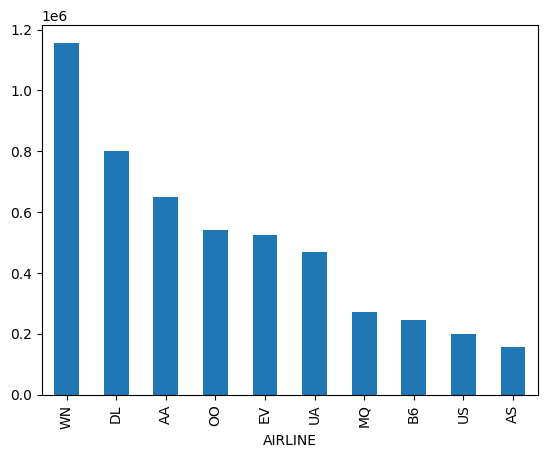

In [15]:
flights['AIRLINE'].value_counts().head(10).plot(kind='bar')

<Axes: ylabel='ORIGIN_AIRPORT'>

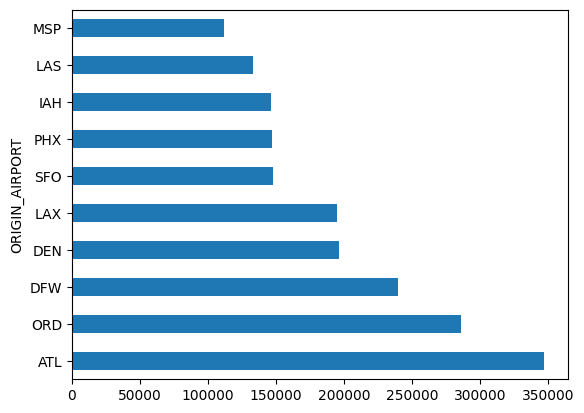

In [16]:
flights['ORIGIN_AIRPORT'].value_counts().head(10).plot(kind='barh')

<Axes: title={'center': 'Monthly Flight Counts'}, xlabel='MONTH'>

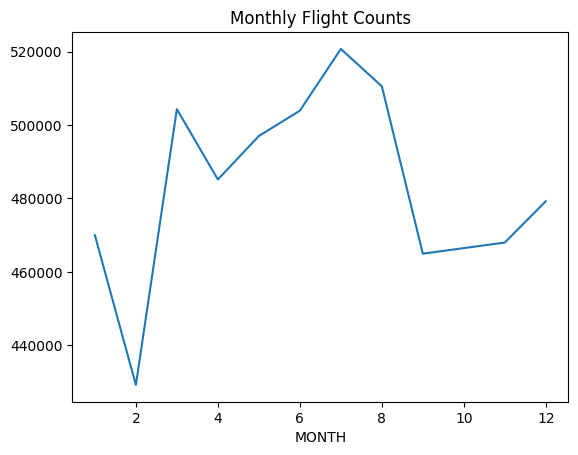

In [17]:
flights.groupby('MONTH').size().plot(kind='line', title='Monthly Flight Counts')

<Axes: title={'center': 'Arrival Delay Distribution'}, ylabel='Frequency'>

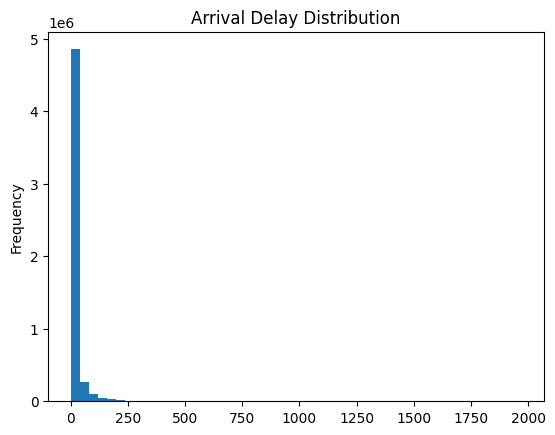

In [18]:
flights['ARRIVAL_DELAY'].plot(kind='hist', bins=50, title='Arrival Delay Distribution')

Descriptive Statistics Summary

            YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  5819079.0  5.819079e+06  5.819079e+06  5.819079e+06   5.819079e+06   
mean      2015.0  6.524085e+00  1.570459e+01  3.926941e+00   2.173093e+03   
std          0.0  3.405137e+00  8.783425e+00  1.988845e+00   1.757064e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  4.000000e+00  8.000000e+00  2.000000e+00   7.300000e+02   
50%       2015.0  7.000000e+00  1.600000e+01  4.000000e+00   1.690000e+03   
75%       2015.0  9.000000e+00  2.300000e+01  6.000000e+00   3.230000e+03   
max       2015.0  1.200000e+01  3.100000e+01  7.000000e+00   9.855000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         5.819079e+06    5.732926e+06     5.732926e+06  5.730032e+06   
mean          1.329602e+03    1.335204e+03     9.370158e+00  1.607166e+01   
std           4.837518e+02    4.964233e+02     3.708094e+01  8.895574e+00  

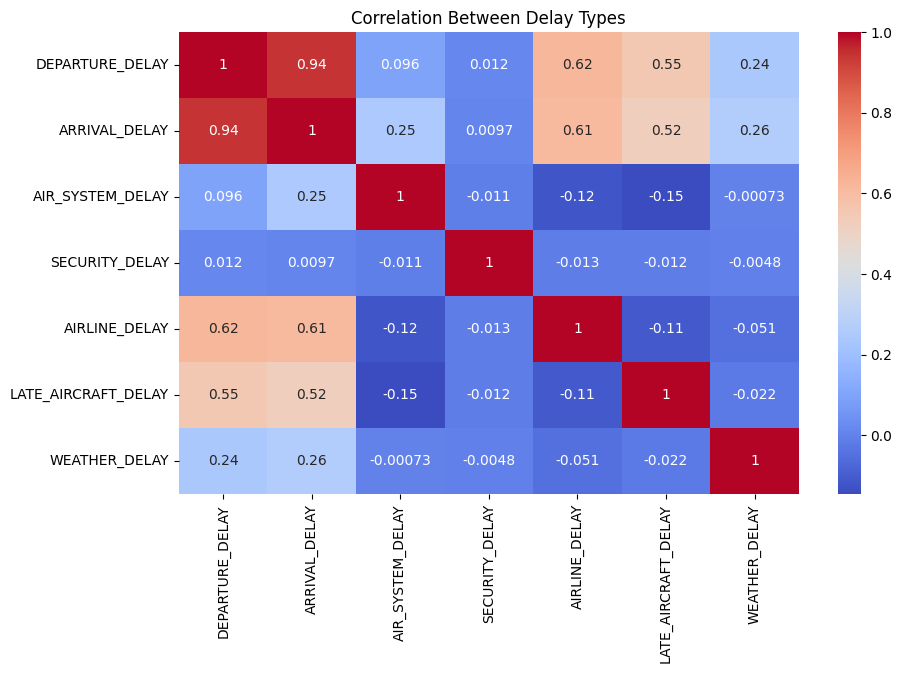

In [21]:
# Basic stats
print(flights.describe())

# Correlation heatmap for delay features
delay_cols = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 
              'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
plt.figure(figsize=(10,6))
sns.heatmap(flights[delay_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Delay Types")
plt.show()

Top Airlines and Flight Volume

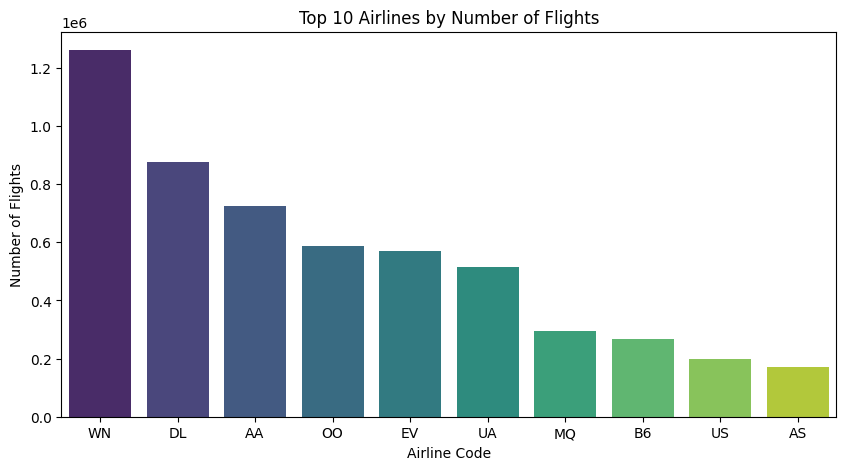

In [22]:
top_airlines = flights['AIRLINE'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_airlines.index, y=top_airlines.values, palette='viridis')
plt.title("Top 10 Airlines by Number of Flights")
plt.xlabel("Airline Code")
plt.ylabel("Number of Flights")
plt.show()

Monthly & Day-wise Flight Trends

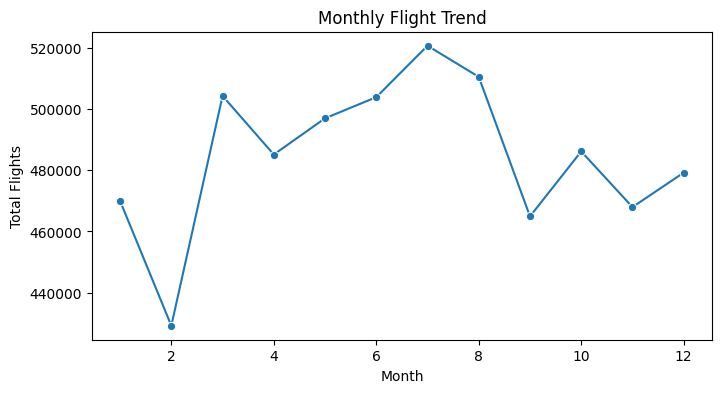

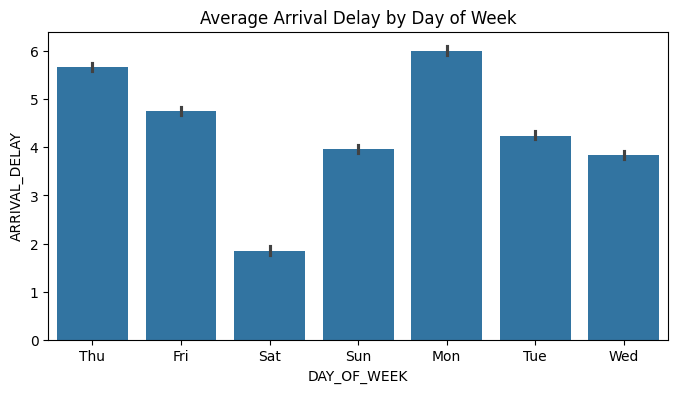

In [25]:
# Flights per Month
monthly = flights.groupby('MONTH')['FLIGHT_NUMBER'].count()
plt.figure(figsize=(8,4))
sns.lineplot(x=monthly.index, y=monthly.values, marker='o')
plt.title("Monthly Flight Trend")
plt.xlabel("Month")
plt.ylabel("Total Flights")
plt.show()

# Day of Week Analysis
dow = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
flights['DAY_OF_WEEK'] = flights['DAY_OF_WEEK'].map(dict(zip(range(1,8), dow)))
plt.figure(figsize=(8,4))
sns.barplot(x='DAY_OF_WEEK', y='ARRIVAL_DELAY', data=flights, estimator='mean')
plt.title("Average Arrival Delay by Day of Week")
plt.show()

Delay Distribution and Cancellations

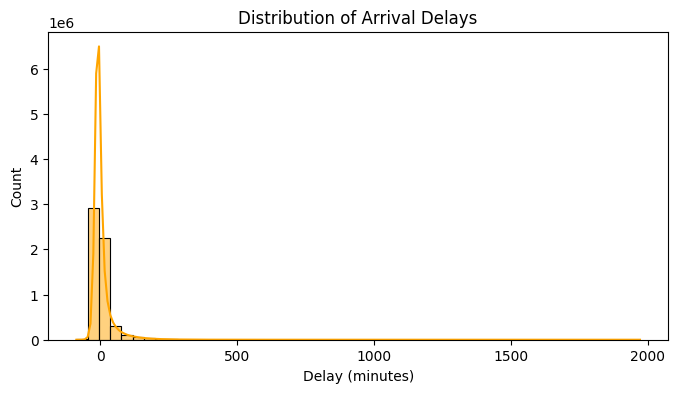

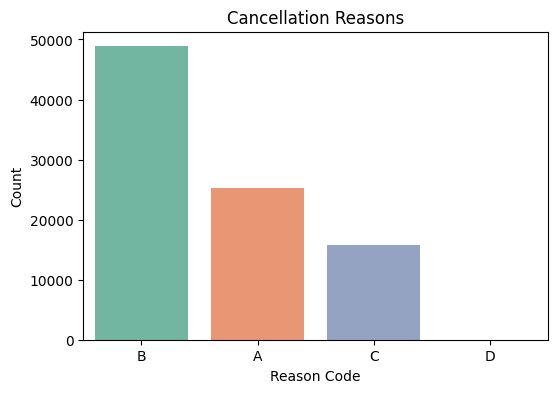

In [27]:
plt.figure(figsize=(8,4))
sns.histplot(flights['ARRIVAL_DELAY'], bins=50, kde=True, color='orange')
plt.title("Distribution of Arrival Delays")
plt.xlabel("Delay (minutes)")
plt.show()

# Cancellations by Reason
cancel_reasons = flights['CANCELLATION_REASON'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=cancel_reasons.index, y=cancel_reasons.values, palette='Set2')
plt.title("Cancellation Reasons")
plt.xlabel("Reason Code")
plt.ylabel("Count")
plt.show()

Route & Airport Level Insights

In [30]:
flights['ROUTE'] = flights['ORIGIN_AIRPORT'].astype(str) + "-" + flights['DESTINATION_AIRPORT'].astype(str)

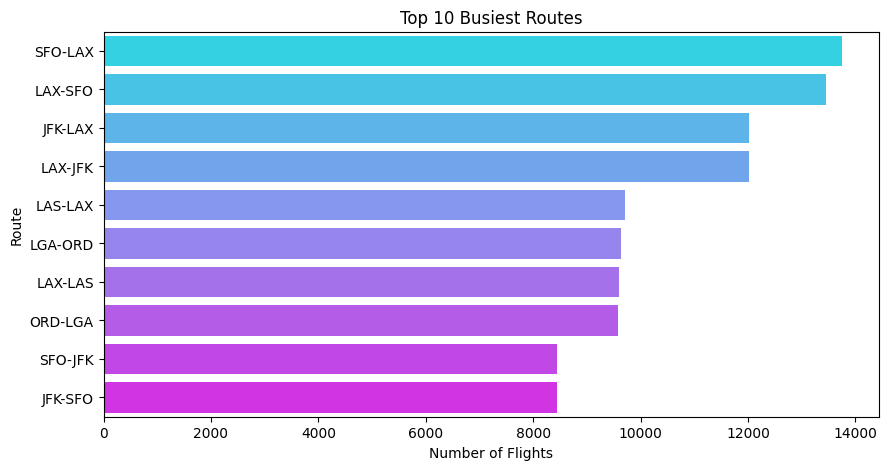

In [31]:
top_routes = flights['ROUTE'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(y=top_routes.index, x=top_routes.values, palette='cool')
plt.title("Top 10 Busiest Routes")
plt.xlabel("Number of Flights")
plt.ylabel("Route")
plt.show()